In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()

raw_data.keys()

X, y = raw_data.data, raw_data.target

print(f"Any NaNs: {np.isnan(X).any()}")
print(f"{X.shape=}, {y.shape=}")

Any NaNs: False
X.shape=(569, 30), y.shape=(569,)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



## MLP network

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "input_layer"))
    model.add(Dense(32, name = "hidden1", activation = "relu")) # Change to He initialization
    model.add(Dense(32, name = "hidden2", activation = "relu"))
    model.add(Dense(1, name = "output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

model = MLP()
model.summary()


Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                992       
                                                                 
 hidden2 (Dense)             (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(scaled_X_train, y_train, epochs = 500, validation_split = .2, verbose = 1)

Epoch 1/500
11/12 [==========================>...] - ETA: 0s - loss: 0.6705

2022-04-20 11:35:13.613686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-20 11:35:13.810929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 15ms/step - loss: 0.6650 - val_loss: 0.4982
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4203 - val_loss: 0.3420
Epoch 3/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2889 - val_loss: 0.2588
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.2136 - val_loss: 0.2099
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 0.1679 - val_loss: 0.1798
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.1376 - val_loss: 0.1596
Epoch 7/500
12/12 [==============================] - 0s 7ms/step - loss: 0.1166 - val_loss: 0.1448
Epoch 8/500
12/12 [==============================] - 0s 7ms/step - loss: 0.1015 - val_loss: 0.1341
Epoch 9/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0898 - val_loss: 0.1262
Epoch 10/500
12/12 [==============================] - 0s 7ms/step - loss: 0.0812 - val_loss: 0.1194
Epoch 11/500
12/12 

In [20]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.665008,0.498208
1,0.420280,0.341952
2,0.288901,0.258823
3,0.213573,0.209871
4,0.167915,0.179778


<AxesSubplot:>

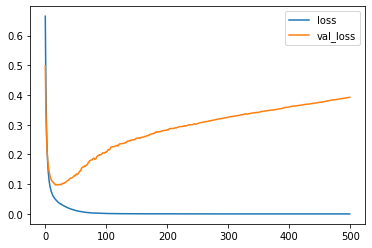

In [21]:
df_loss.plot()

In [28]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                992       
                                                                 
 hidden2 (Dense)             (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(scaled_X_train, y_train, epochs = 50, validation_split = .2, verbose = 1)

Epoch 1/50
10/12 [========================>.....] - ETA: 0s - loss: 0.6763

2022-04-20 11:41:56.912503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 18ms/step - loss: 0.6613 - val_loss: 0.4994
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.4187 - val_loss: 0.3413
Epoch 3/50
 1/12 [=>............................] - ETA: 0s - loss: 0.2855

2022-04-20 11:41:57.122523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 7ms/step - loss: 0.2898 - val_loss: 0.2573
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.2128 - val_loss: 0.2104
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1681 - val_loss: 0.1794
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1384 - val_loss: 0.1604
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1177 - val_loss: 0.1451
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.1018 - val_loss: 0.1345
Epoch 9/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0905 - val_loss: 0.1271
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0815 - val_loss: 0.1208
Epoch 11/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0744 - val_loss: 0.1155
Epoch 12/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0686 - val_loss: 0.1115
Epoch 13/50
12/12 [=========

<AxesSubplot:>

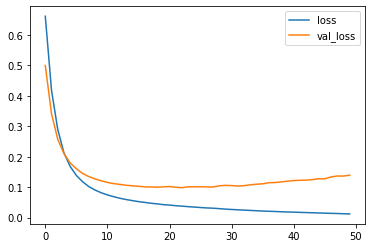

In [30]:
pd.DataFrame(model.history.history).plot()

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



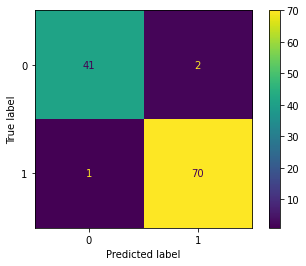

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5) * 1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))

In [26]:
import sys

sys.version_info

sys.version_info(major=3, minor=9, micro=12, releaselevel='final', serial=0)